## Coding Problem
<br>
Consider the following unconstrained minimization problem
$$
\min_{x\in R^3} f(x) = \frac{1}{2}x^T Ax + x^T b
$$
where $A$ and $b$ are defined as
$$
A = \begin{bmatrix}
2 & -1 & 0\\
-1 & 2 & -1\\
0 & -1 & 2
\end{bmatrix}
\qquad 
b = \begin{bmatrix}
1\\ 
1\\ 
1
\end{bmatrix}
$$
<br>

In [1]:
import numpy as np
A = np.array([[2,-1,0],
              [-1,2,-1],
              [0,-1,2]])
b = np.array([1,
              1,
              1])
x = -1*(np.linalg.inv(A)).dot(b)
y = 1/2 * x.T @ A @ x + x.T @ b
print('x* = \n',x)
print('y* = \n',y)

x* = 
 [-1.5 -2.  -1.5]
y* = 
 -2.5000000000000004


2. Implement the gradient descent method with backtracking line search starting with $x_0=[1,1,1]^T$. Let the maximum iteration number be $50$, $\alpha=0.25$ and $\beta=0.1$. Record the function value of each iteration and plot it (x-axis: number of iterations / y-axis: function value of that iteration). </br>

The backtracking line search
if
$$
f(x+t△x)>f(x)+αt▽f(x)△x
$$
then we need to update $t$, $t=β×t$


In [2]:
# Code goes here
def f(x,A,b):
  f = 0.5 * x.T.dot(A).dot(x)+b.T.dot(x)
  return f
def f_grad(x,A,b):
  f_grad = A.dot(x) + b
  return f_grad
def backtracking(w0, A, b, nit = 50, alpha = 0.25, beta = 0.1, t =1):
  hist = {'w':[],'f':[]}
  for i in range(int(nit)):
    fgrad = f_grad(w0, A, b)
    delta = -fgrad
    left = f(w0 + t * delta, A, b)
    right = f(w0, A, b) + alpha * t * fgrad.T.dot(delta)
    while left > right:
      t = beta * t
      left = f(w0 + t * delta, A, b)
      right = f(w0, A, b) + alpha * t * fgrad.T.dot(delta)
    w1 = w0 - t*fgrad
    w0 = w1
    hist['w'].append(w0)
    hist['f'].append(f(w0, A, b))
  return hist

w0 = np.array([1,
               1,
               1])
hist01 = backtracking(w0, A, b)

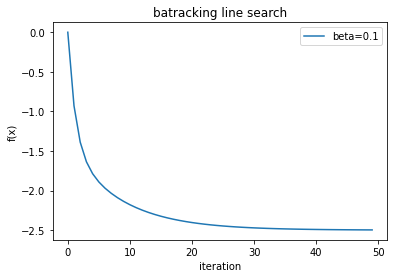

In [3]:
# Plot the function value each iteration
import matplotlib.pyplot as plt

x_axis = np.arange(50)
plt.plot(x_axis,hist01['f'])
plt.xlabel("iteration")
plt.ylabel("f(x)")
plt.title("batracking line search")
plt.legend(['beta=0.1'])

3. Change the learning rate to $\beta=0.3$ and $\beta=0.8$, repeate the process in (2) and plot the function values. Comment on how the learning rate will affect the gradient descent method.

In [4]:
# Code goes here
hist03 = backtracking(w0, A, b, 50, 0.25, 0.3, 1)
hist08 = backtracking(w0, A, b, 50, 0.25, 0.8, 1)

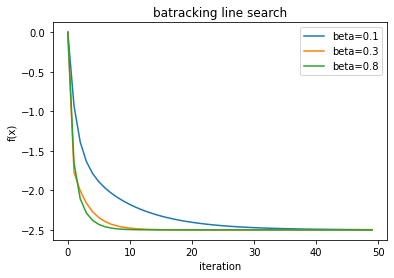

In [6]:
# Plot the function value each iteration (for different beta)
x_axis = np.arange(50)
plt.plot(x_axis,hist01['f'])
plt.plot(x_axis,hist03['f'])
plt.ylabel("f(x)")
plt.title("batracking line search")
plt.plot(x_axis,hist08['f'])
plt.xlabel("iteration")
plt.legend(['beta=0.1','beta=0.3','beta=0.8'])